In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

planes = pd.read_csv('../data/Airplane_Crashes_and_Fatalities_since_1908.csv',encoding = "utf-8")
print('This is the data')
planes.head()

This is the data


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [3]:
# convert date to pandas datetime format to extract the year
planes['Date'] = pd.to_datetime(planes['Date'], errors='coerce')

# finding survivors
planes['Survived'] = planes['Aboard'] - planes['Fatalities']

# finding total number of people dead
planes['Total Died'] = planes['Fatalities'] + planes['Ground']

# yearly Summary
yearly_summary = planes.groupby(planes['Date'].dt.year).agg({
    'Date': 'count',
    'Aboard': 'sum',
    'Survived': 'sum',
    'Fatalities': 'sum',
    'Ground' : 'sum',
    'Total Died': 'sum'
}).rename(columns={'Date': 'Crashes'})

print("Yearly Summary:\n", yearly_summary)

Yearly Summary:
       Crashes  Aboard  Survived  Fatalities  Ground  Total Died
Date                                                           
1908        1     2.0       1.0         1.0     0.0         1.0
1912        1     5.0       0.0         5.0     0.0         5.0
1913        3    51.0       6.0        45.0     0.0        45.0
1915        2    60.0      20.0        40.0     0.0        40.0
1916        5   109.0       1.0       108.0     0.0       108.0
...       ...     ...       ...         ...     ...         ...
2005       51  2164.0     858.0      1306.0    59.0      1365.0
2006       49  1413.0     277.0      1136.0     4.0      1140.0
2007       54  1364.0     433.0       931.0    57.0       988.0
2008       62  1463.0     643.0       820.0    60.0       880.0
2009       24   891.0     310.0       581.0     3.0       580.0

[98 rows x 6 columns]


In [4]:
# Highest Number of Crashes by Operator
crashes_by_operator = planes.groupby('Operator').size().sort_values(ascending=False).head(1)

# Highest Number of Crashes by Type of Aircraft
crashes_by_type = planes.groupby('Type').size().sort_values(ascending=False).head(1)

print("\nOperator with the Highest Number of Crashes:\n", crashes_by_operator)
print("\nType of Aircraft with the Highest Number of Crashes:\n", crashes_by_type)


Operator with the Highest Number of Crashes:
 Operator
Aeroflot    179
dtype: int64

Type of Aircraft with the Highest Number of Crashes:
 Type
Douglas DC-3    334
dtype: int64


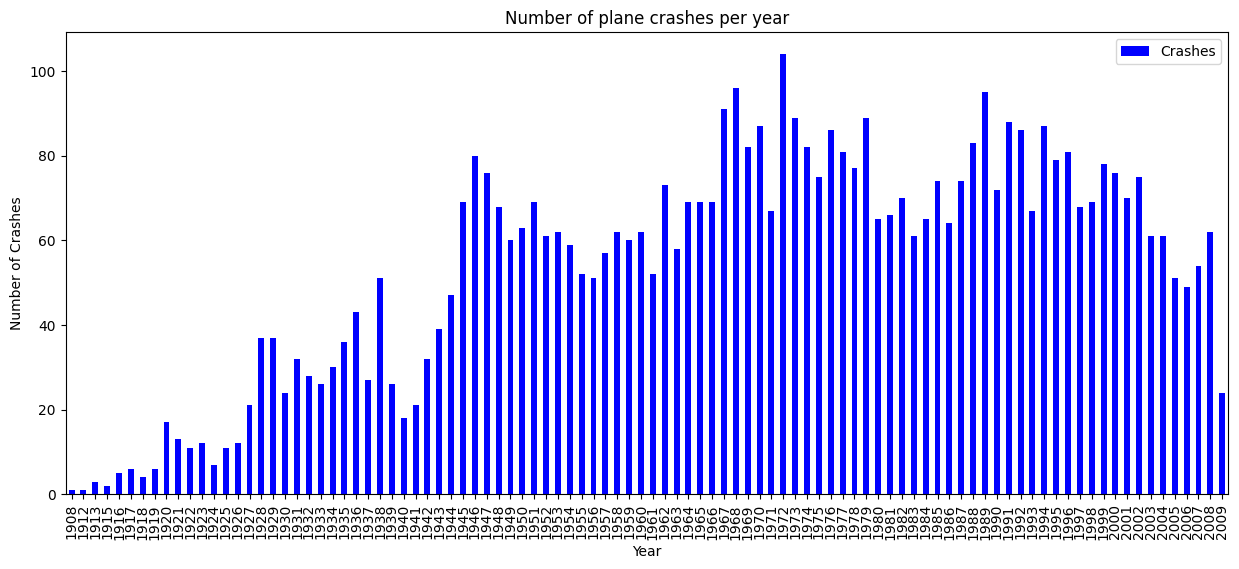

In [5]:
# Number of crashes per year
plt.figure(figsize=(15, 6))
yearly_summary['Crashes'].plot(kind='bar', color='blue', label='Crashes')
plt.title('Number of plane crashes per year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend()

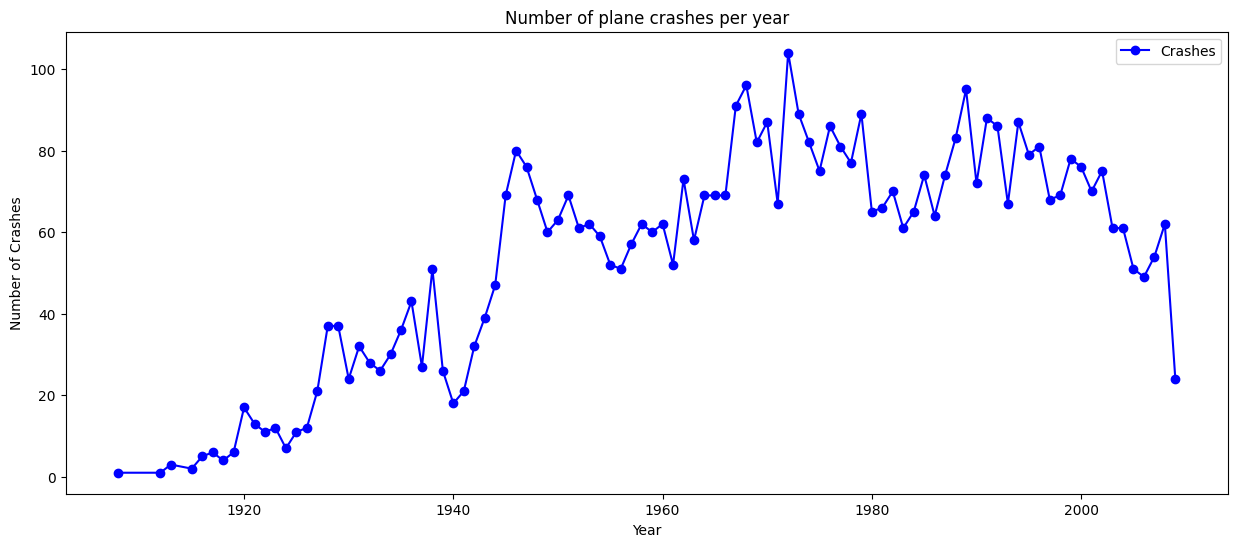

In [20]:
# Number of crashes per year
plt.figure(figsize=(15, 6))
yearly_summary['Crashes'].plot(kind='line', color='blue', marker='o', linestyle='-', label='Crashes')
plt.title('Number of plane crashes per year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend()

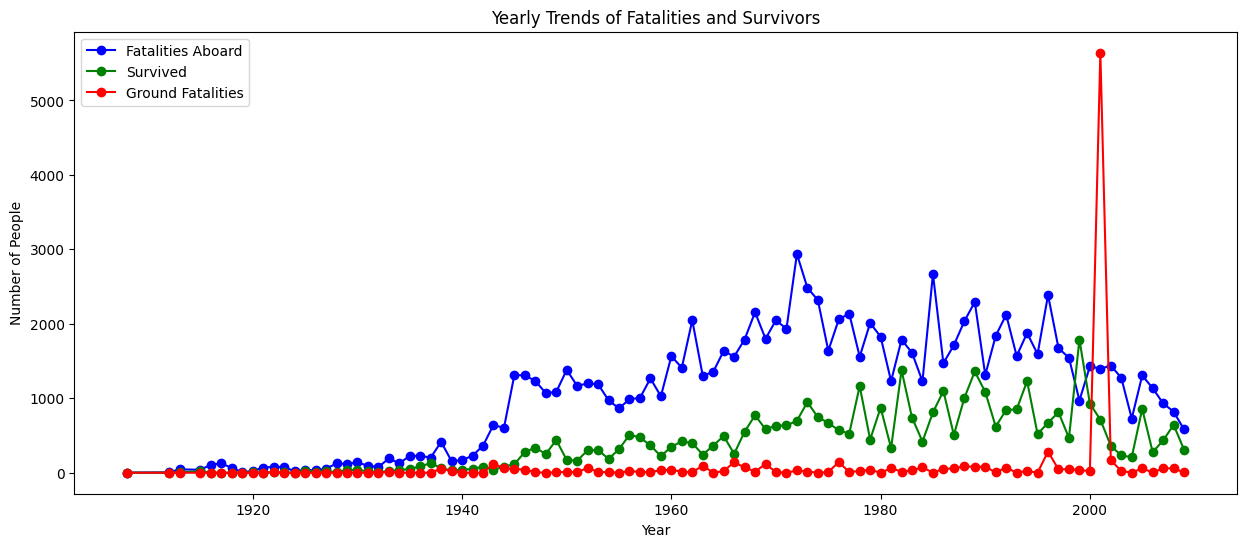

In [22]:
# Number of fatalities, survivors per year
plt.figure(figsize=(15, 6))
yearly_summary['Fatalities'].plot(kind='line', color='blue', marker='o', linestyle='-', label='Fatalities Aboard')
yearly_summary['Survived'].plot(kind='line', color='green', marker='o', linestyle='-', label='Survived')
yearly_summary['Ground'].plot(kind='line', color='red', marker='o', linestyle='-', label='Ground Fatalities')
plt.title('Yearly Trends of Fatalities and Survivors')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()

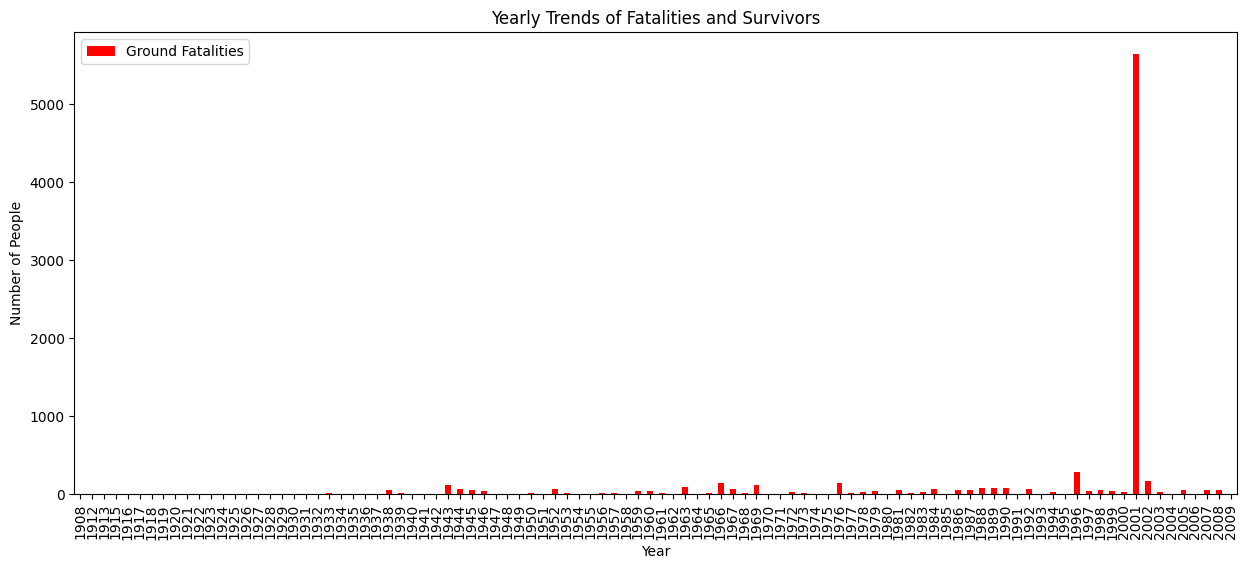

In [8]:
# Number of ground fatalities per year
plt.figure(figsize=(15, 6))
yearly_summary['Ground'].plot(kind='bar', color='red', label='Ground Fatalities')
plt.title('Yearly Trends of Fatalities and Survivors')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()

In [9]:
# Investigating 9/11
specific_date = '2001-09-11'

# Convert the specific_date string to a datetime object for accurate comparison
specific_date = pd.to_datetime(specific_date)

# Filter the DataFrame for rows where the 'Date' matches the specific_date
filtered_data = planes[planes['Date'] == specific_date]

# Display the filtered data
print(filtered_data)


           Date   Time                   Location           Operator Flight #  \
4801 2001-09-11  10:03  Shanksville, Pennsylvania   United Air Lines       93   
4802 2001-09-11  09:45       Arlington, Virginia.  American Airlines       77   
4803 2001-09-11  08:47    New York City, New York  American Airlines       11   
4804 2001-09-11  09:03    New York City, New York   United Air Lines      175   

                              Route              Type Registration      cn/In  \
4801         Newark - San Francisco  Boeing B-757-222       N591UA  28142/718   
4802  Washington D.C. - Los Angeles  Boeing B-757-223       N644AA  24602/365   
4803           Boston - Los Angeles  Boeing 767-223ER       N334AA  22332/169   
4804           Boston - Los Angeles  Boeing B-767-222       N612UA   21873/41   

      Aboard  Fatalities  Ground  \
4801    44.0        44.0     0.0   
4802    64.0        64.0   125.0   
4803    92.0        92.0  2750.0   
4804    65.0        65.0  2750.0   

       

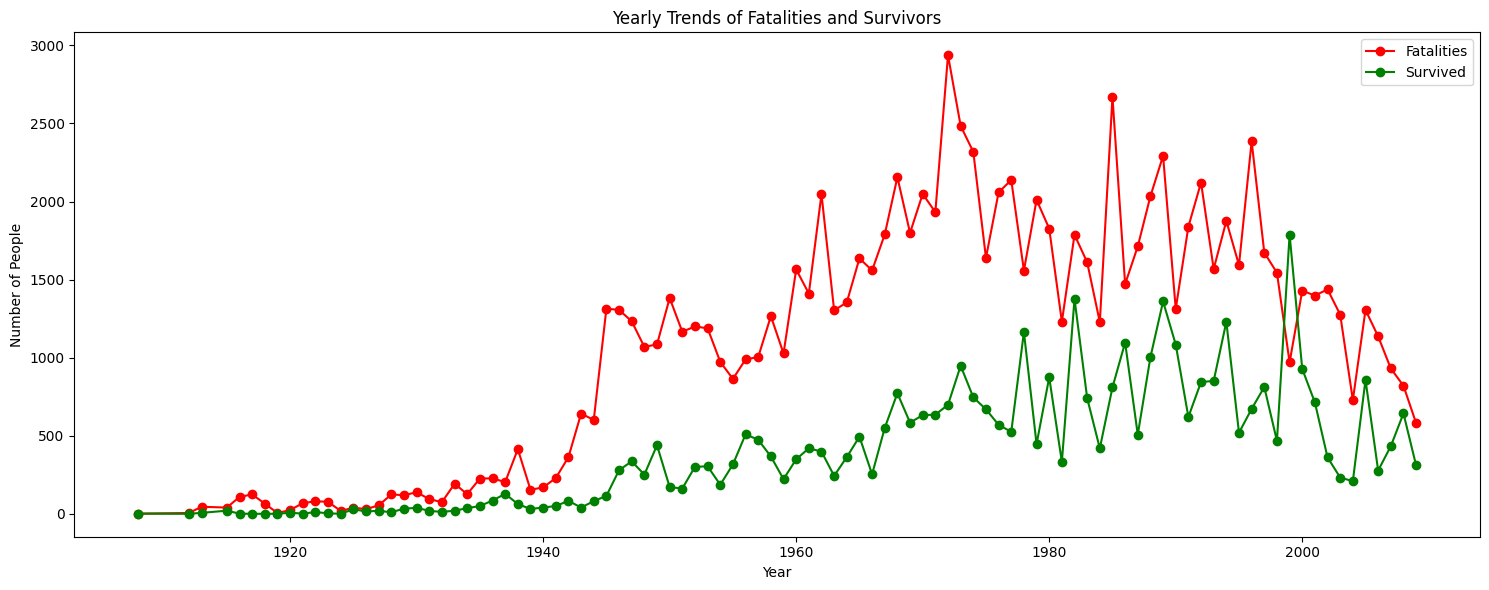

In [19]:
plt.figure(figsize=(15, 6))
yearly_summary['Fatalities'].plot(kind='line', color='red', marker='o', linestyle='-', label='Fatalities')
yearly_summary['Survived'].plot(kind='line', color='green', marker='o', linestyle='-', label='Survived')
plt.title('Yearly Trends of Fatalities and Survivors')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
passengers = pd.read_csv('../data/number-airline-passengers.csv',encoding = "utf-8")
print('This is the data')
passengers.head()


This is the data


,Entity,Code,Year,Passengers
0,World,OWID_WRL,1945,9000000.0
1,World,OWID_WRL,1946,18000000.0
2,World,OWID_WRL,1947,21000000.0
3,World,OWID_WRL,1948,24000000.0
4,World,OWID_WRL,1949,27000000.0


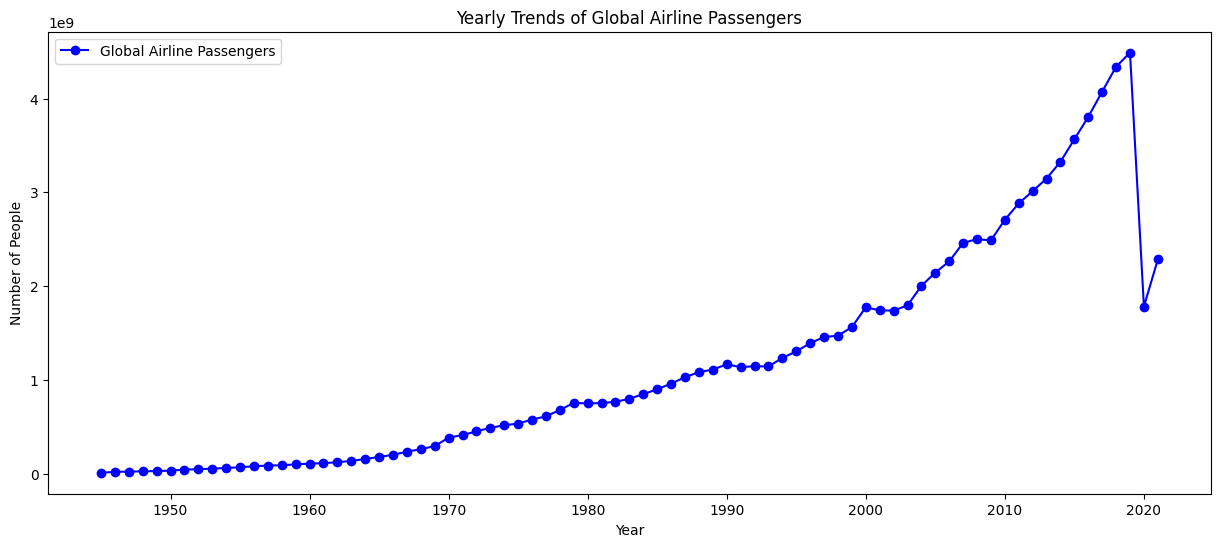

In [17]:
plt.figure(figsize=(15,6))
plt.plot(passengers['Year'], passengers['Passengers'], color='blue', marker='o', linestyle='-', label='Global Airline Passengers')
plt.title('Yearly Trends of Global Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()

In [13]:
# Since 'Year' is already a column in passengers, we just need to ensure it's in the right format
passengers['Year'] = pd.to_numeric(passengers['Year'], errors='coerce')

# Merge on the 'Year' column using an inner join
merged_df = pd.merge(yearly_summary.reset_index(), passengers, left_on=yearly_summary.index.name, right_on='Year', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:\n", merged_df.head())



Merged DataFrame:
    Date  Crashes  Aboard  Survived  Fatalities  Ground  Total Died Entity  \
0  1945       69  1429.0     115.0      1314.0    48.0      1362.0  World   
1  1946       80  1498.0     279.0      1306.0    43.0      1349.0  World   
2  1947       76  1569.0     336.0      1233.0     6.0      1239.0  World   
3  1948       68  1320.0     251.0      1069.0     1.0      1070.0  World   
4  1949       60  1524.0     439.0      1085.0     4.0      1089.0  World   

       Code  Year  Passengers  
0  OWID_WRL  1945   9000000.0  
1  OWID_WRL  1946  18000000.0  
2  OWID_WRL  1947  21000000.0  
3  OWID_WRL  1948  24000000.0  
4  OWID_WRL  1949  27000000.0  


In [14]:
# Calculate the percentage of deaths out of total passengers
merged_df['Percentage Died'] = (merged_df['Total Died'] / merged_df['Passengers']) * 100

# Display the DataFrame to verify the new column
print(merged_df[['Year', 'Percentage Died']].head())


   Year  Percentage Died
0  1945         0.015133
1  1946         0.007494
2  1947         0.005900
3  1948         0.004458
4  1949         0.004033


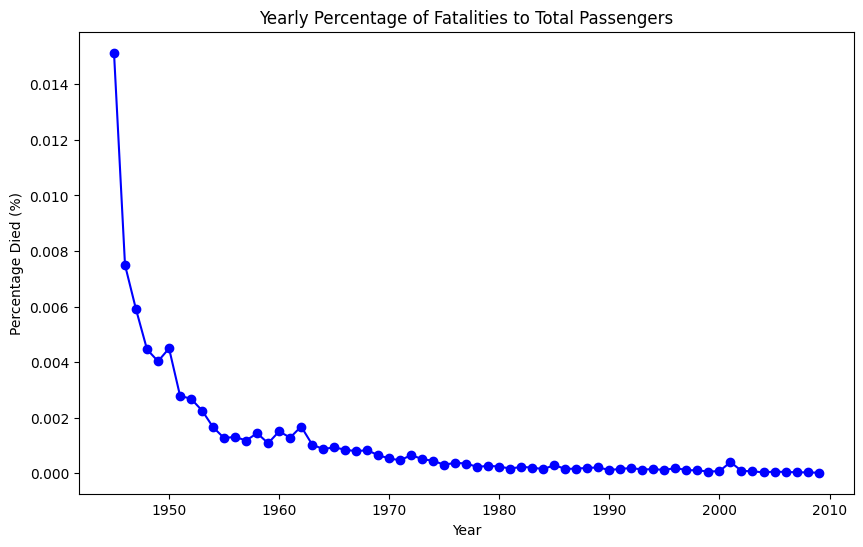

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Percentage Died'], marker='o', linestyle='-', color='blue')

# Adding titles and labels
plt.title('Yearly Percentage of Fatalities to Total Passengers')
plt.xlabel('Year')
plt.ylabel('Percentage Died (%)')
plt.show()